кто?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

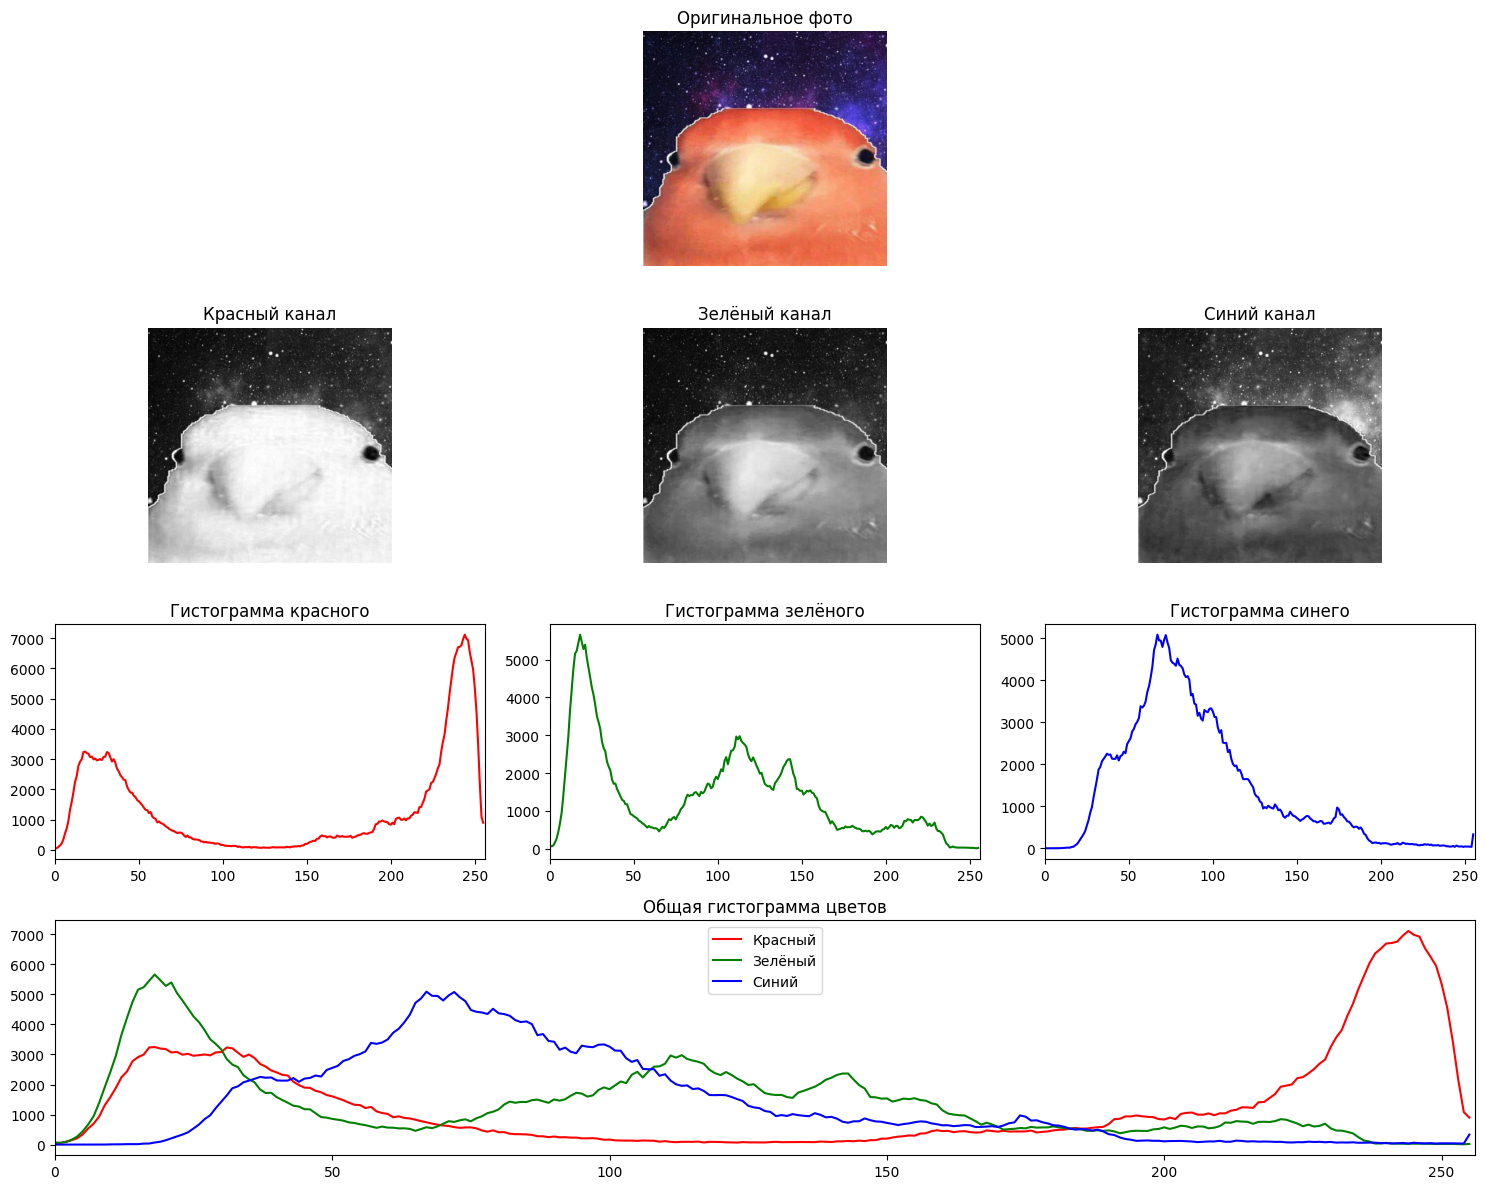

In [2]:
# 1. Загружаем картинку
img = cv2.imread('pepuk.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Переделываем из BGR в RGB

# 2. Разделяем на 3 цвета: красный, зелёный, синий
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# 3. Создаём большое окно для графиков
plt.figure(figsize=(15, 12))

# 4. Показываем оригинальную картинку
plt.subplot(4, 3, 2)  # Первая строка, середина
plt.imshow(img)
plt.title('Оригинальное фото')
plt.axis('off')

# 5. Показываем каждый цвет отдельно (чёрно-белым)
# Красный
plt.subplot(4, 3, 4)
plt.imshow(red, cmap='gray')
plt.title('Красный канал')
plt.axis('off')

# Зелёный
plt.subplot(4, 3, 5)
plt.imshow(green, cmap='gray')
plt.title('Зелёный канал')
plt.axis('off')

# Синий
plt.subplot(4, 3, 6)
plt.imshow(blue, cmap='gray')
plt.title('Синий канал')
plt.axis('off')

# 6. Рисуем гистограммы для каждого цвета
# Гистограмма красного
plt.subplot(4, 3, 7)
hist_red = np.histogram(red, bins=256, range=(0, 256))[0]
plt.plot(hist_red, color='red')
plt.title('Гистограмма красного')
plt.xlim(0, 256)

# Гистограмма зелёного
plt.subplot(4, 3, 8)
hist_green = np.histogram(green, bins=256, range=(0, 256))[0]
plt.plot(hist_green, color='green')
plt.title('Гистограмма зелёного')
plt.xlim(0, 256)

# Гистограмма синего
plt.subplot(4, 3, 9)
hist_blue = np.histogram(blue, bins=256, range=(0, 256))[0]
plt.plot(hist_blue, color='blue')
plt.title('Гистограмма синего')
plt.xlim(0, 256)

# 7. Рисуем общую гистограмму всех цветов
plt.subplot(4, 1, 4)  # Занимаем всю последнюю строку
plt.plot(hist_red, color='red', label='Красный')
plt.plot(hist_green, color='green', label='Зелёный')
plt.plot(hist_blue, color='blue', label='Синий')
plt.title('Общая гистограмма цветов')
plt.xlim(0, 256)
plt.legend()

# 8. Делаем чтобы всё красиво поместилось
plt.tight_layout()
plt.show()

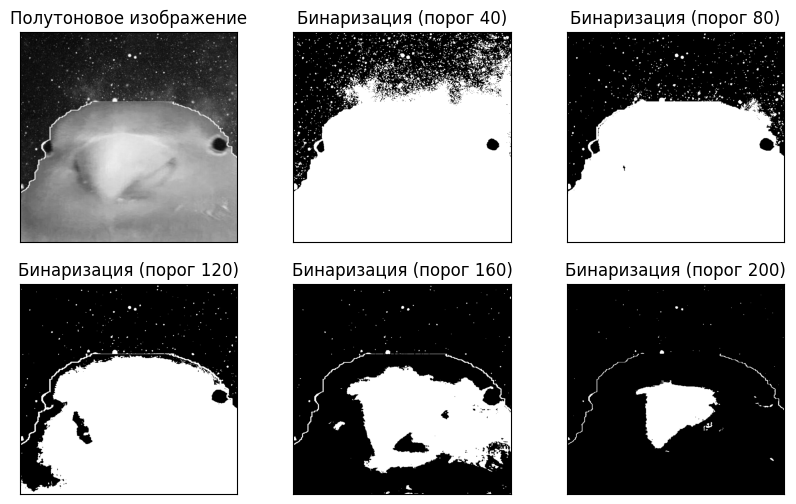

In [8]:
# Загрузка изображения и преобразование в оттенки серого
im = cv2.cvtColor(cv2.imread("pepuk.jpg"), cv2.COLOR_BGR2GRAY)
# Бинаризация

thr, imbin1 = cv2.threshold(im, 40, 255, cv2.THRESH_BINARY)
thr, imbin2 = cv2.threshold(im, 80, 255, cv2.THRESH_BINARY)
thr, imbin3 = cv2.threshold(im, 120, 255, cv2.THRESH_BINARY)
thr, imbin4 = cv2.threshold(im, 160, 255, cv2.THRESH_BINARY)
thr, imbin5 = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
# Отображение изображения и гистограммы
plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('Полутоновое изображение', fontsize=12), plt.xticks([]),
plt.yticks([])
plt.subplot(232), plt.imshow(imbin1, cmap='gray')
plt.title('Бинаризация (порог 40)', fontsize=12), plt.xticks([]),
plt.yticks([])
plt.subplot(233), plt.imshow(imbin2, cmap='gray')
plt.title('Бинаризация (порог 80)', fontsize=12), plt.xticks([]),
plt.yticks([])
plt.subplot(234), plt.imshow(imbin3, cmap='gray')
plt.title('Бинаризация (порог 120)', fontsize=12), plt.xticks([]),
plt.yticks([])
plt.subplot(235), plt.imshow(imbin4, cmap='gray')
plt.title('Бинаризация (порог 160)', fontsize=12), plt.xticks([]),
plt.yticks([])
plt.subplot(236), plt.imshow(imbin5, cmap='gray')
plt.title('Бинаризация (порог 200)', fontsize=12), plt.xticks([]),
plt.yticks([])
plt.show()

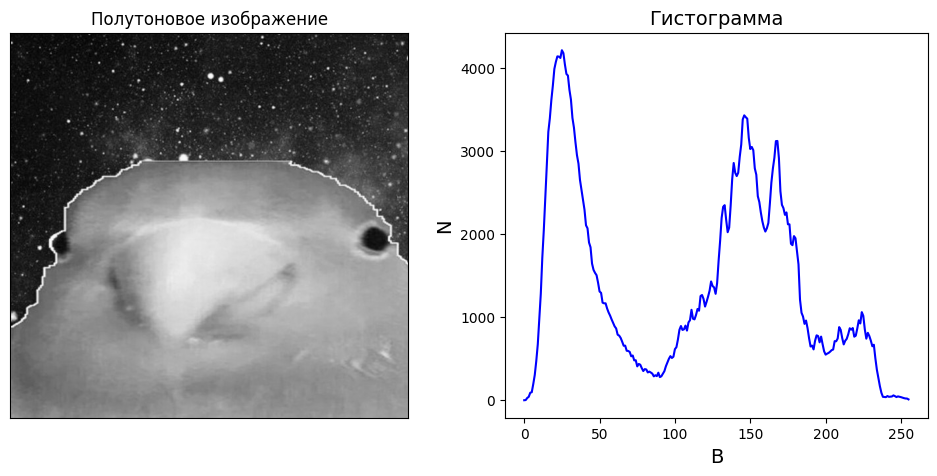

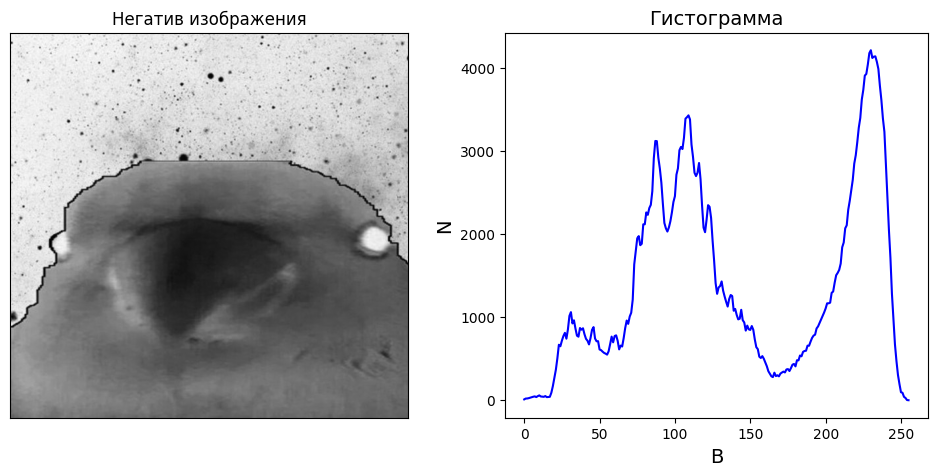

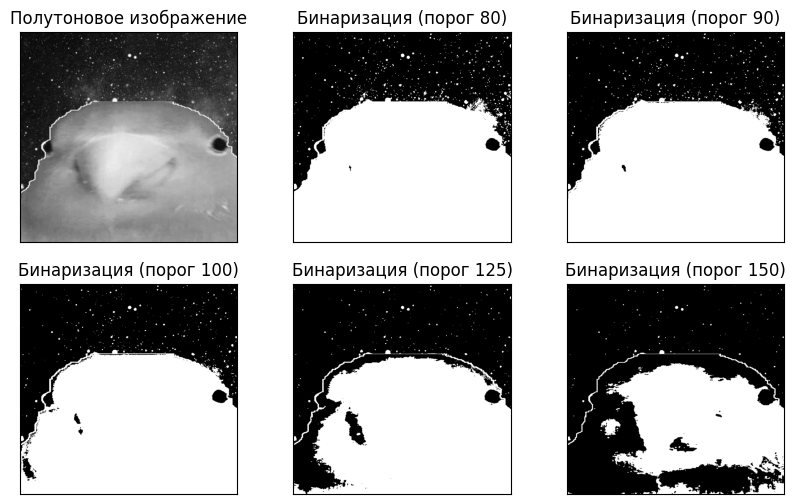

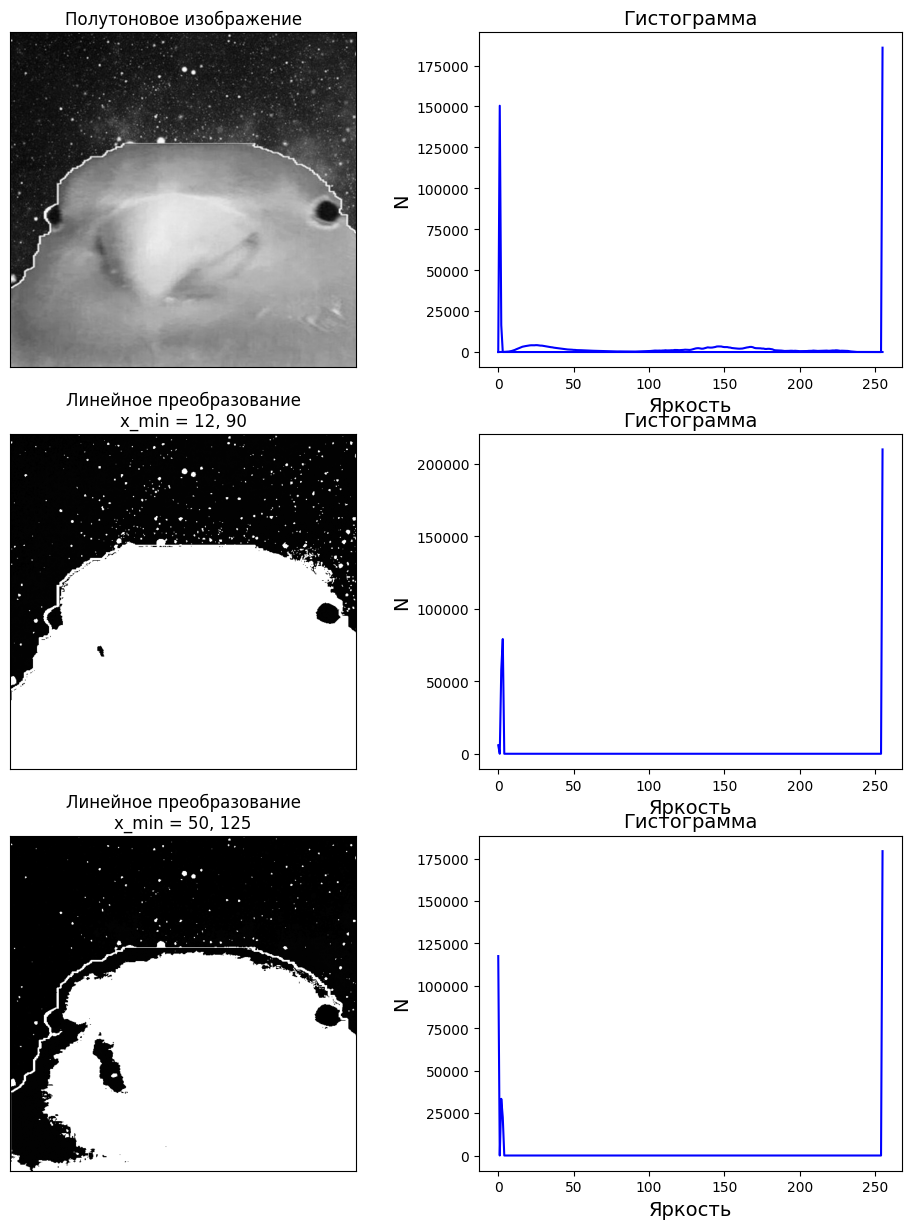

In [11]:
def plot_h(*hists, xlabel, ylabel, title):
    for i, h in enumerate(hists):
        if i % 2 == 0:
            plt.plot(h, hists[i+1])
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=14)


def plot_im(im, title, im_type):
    if im_type == "rgb":
        plt.imshow(im)
    elif im_type == "gray":
        plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.title(title, fontsize=12)
    plt.xticks([])
    plt.yticks([])


def hist(im, bins):
    height, width = im.shape[:2]
    res = np.zeros(bins)
    for i in range(height):
        for j in range(width):
            val = im[i, j]
            if val < bins:
                res[val] += 1
    return res


def neg(im):
    return 255 - im


def bin_threshold(im, threshold):
    return (im > threshold).astype(np.uint8) * 255


def linear_transform(im, x_min, x_max):
    res = np.zeros_like(im, dtype=np.uint8)
    mask = (im >= x_min) & (im <= x_max)
    res[mask] = 255 * (im[mask] - x_min) / (x_max - x_min)
    res[im > x_max] = 255
    return res


def main():
    im = cv2.cvtColor(cv2.imread("pepuk.jpg"), cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_im(im, 'Полутоновое изображение', 'gray')
    plt.subplot(122)
    plot_h(hist(im, 256), 'b', xlabel='B', ylabel='N', title='Гистограмма')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_im(neg(im), 'Негатив изображения', 'gray')
    plt.subplot(122)
    plot_h(hist(neg(im), 256), 'b', xlabel='B', ylabel='N', title='Гистограмма')
    plt.show()

    im = cv2.cvtColor(cv2.imread("pepuk.jpg"), cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(10, 6))
    thresholds = [80, 90, 100, 125, 150]
    plt.subplot(231)
    plot_im(im, 'Полутоновое изображение', 'gray')
    for i, thresh in enumerate(thresholds, start=2):
        plt.subplot(2, 3, i)
        plot_im(bin_threshold(im, thresh), f'Бинаризация (порог {thresh})', 'gray')
    plt.show()

    im = cv2.cvtColor(cv2.imread("pepuk.jpg"), cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(12, 20))
    transforms = [
        (0, 120, '0, 120'),
        (12, 90, '12, 90'),
        (50, 125, '50, 125')
    ]

    for i, (x_min, x_max, label) in enumerate(transforms, start=1):
        transformed = linear_transform(im, x_min, x_max)
        plt.subplot(4, 2, 2*i-1)
        plot_im(transformed, f'Линейное преобразование\nx_min = {label}', 'gray')
        plt.subplot(4, 2, 2*i)
        plot_h(hist(transformed, 256), 'b', xlabel='Яркость', ylabel='N', title='Гистограмма')

    plt.subplot(421)
    plot_im(im, 'Полутоновое изображение', 'gray')
    plt.subplot(422)
    plot_h(hist(im, 256), 'b', xlabel='Яркость', ylabel='N', title='Гистограмма')
    plt.show()

main()